In [25]:
import sys
import face_alignment
sys.path.append('..')
from align_faces import align_face, align_keypoints
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|                                                                                       | 0/25 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████| 25/25 [00:22<00:00,  1.11it/s]


[1, 1, 1, 2, 1, 7, 2, 1, 6, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1]


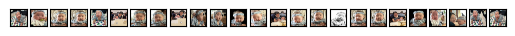

In [308]:
import tqdm
import glob
import torch
import numpy as np
import torchvision
from torchvision.utils import draw_keypoints
from torchvision.io import read_image
from torchvision.io import ImageReadMode
import torchvision.transforms.functional as F
from lib.utils import show_imgs

def get_key_points(im, device='cuda'):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, 
                                    device=device)
    return fa.get_landmarks(im, return_bboxes=True)

# imps = [
#     '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_2730.png',
#     '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_2750.png',
#     '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_0131.png',
# ]
imps = glob.glob('/Users/jiaxuanwang/Downloads/lua training set/lua_png/*.png')
imgs = []
lmks = []
bboxes = []
for imp in tqdm.tqdm(imps):
    im = torchvision.transforms.Resize((450, 450))(
        read_image(imp, ImageReadMode.RGB))
    lmk, lmk_socres, bbox = get_key_points(
        im if im.shape[2] == 3 else im.permute((1,2,0)),
        device='mps')
    lmks.append(lmk)
    imgs.append(
        draw_keypoints(
          im,
          torch.from_numpy(np.array(lmk)), colors="blue", radius=0)
      )
    bboxes.append(bbox)

show_imgs(imgs)
print([len(lmk) for lmk in lmks])

100%|████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 2504.00it/s]


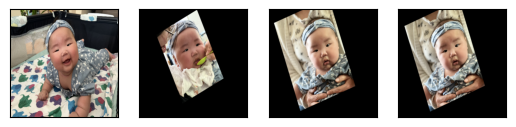

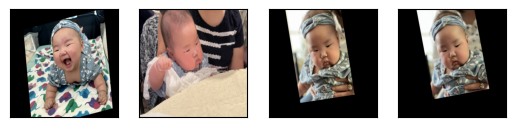

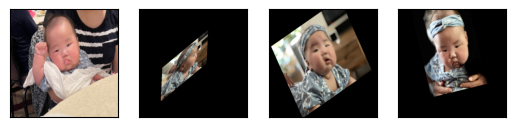

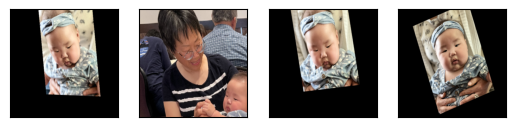

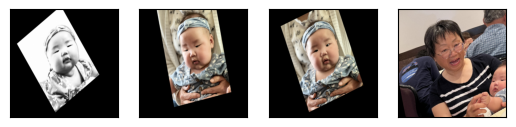

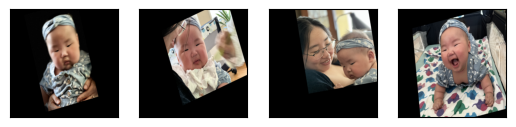

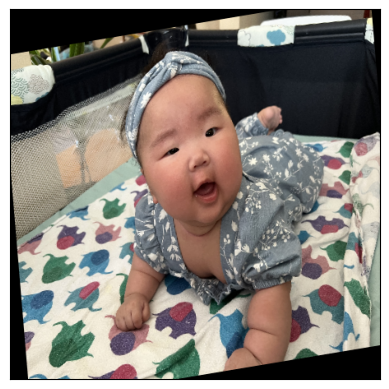

In [309]:
aligned_faces = []
for i, img in enumerate(tqdm.tqdm(imgs)):
    if i == 0:
        aligned_faces.append(img)
    else:
        aligned_faces.append(align_face(img, lmks[i][0], lmks[0][0]))

cadence = 4
for s in range(len(aligned_faces))[::cadence]:
    show_imgs(aligned_faces[s:s+cadence])

In [312]:
aligned_faces[0].dtype, aligned_faces[1].dtype

(torch.uint8, torch.uint8)

In [ ]:
aligned_faces[0]

In [295]:
imgs[0].shape, imgs[0].dtype, imgs[0].device, lmks[0][0].shape

(torch.Size([3, 450, 450]), torch.uint8, device(type='cpu'), (68, 2))

In [296]:
bbox

[array([161.97634602, 110.0635097 , 249.37120533, 200.17390704,
          0.99963939]),
 array([421.6135084 ,  95.63709092, 449.0566408 , 128.58174348,
          0.99907589]),
 array([287.4501175 , 197.56260407, 367.8284668 , 294.85043061,
          0.97554338])]

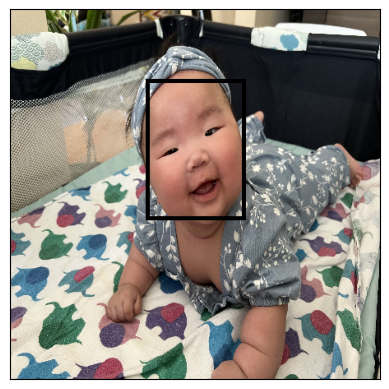

In [321]:
from torchvision.utils import draw_bounding_boxes
img_idx = 0
show_imgs(
    draw_bounding_boxes(imgs[img_idx], 
                        torch.from_numpy(np.array(
                            list(map(lambda b: b[:4], bboxes[img_idx]))
                        )), width=5)
)

165 85 286 256


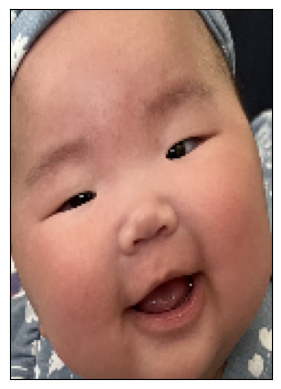

In [320]:
a,b,c,d = list(map(int, bboxes[0][0][:4]))
print(a, b, c, d)
show_imgs(imgs[0][:,b:d, a:c])